# ML project


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
f_risk = pd.read_csv(r"D:\DataScience\MainProjects\MLprojects\ML_project_data\financial_risk_assessment.csv") #to read the data 
f_risk


,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,Non-binary,Bachelor's,Widowed,48088.0,609.0,26187.0,Home,Self-employed,2,Fair,0.317633,NaN,4.0,Susanstad,TN,Djibouti,2.0,0,Low
14996,56,Male,PhD,Single,107193.0,700.0,35111.0,Auto,Self-employed,10,Fair,0.155126,79102.0,NaN,Port Heather,WA,Congo,0.0,0,Medium
14997,29,Non-binary,PhD,Married,46250.0,642.0,44369.0,Home,Unemployed,19,Excellent,0.593999,196930.0,4.0,South Morganchester,LA,Palau,2.0,1,High
14998,53,Non-binary,PhD,Divorced,40180.0,638.0,32752.0,Home,Self-employed,12,Excellent,0.478035,276060.0,NaN,Port Wayne,AK,Rwanda,0.0,2,High


In [3]:
for i in f_risk:
    j=i.replace(' ','_')
    f_risk=f_risk.rename(columns={i:j.capitalize()}) #to capitalise the first letter and adding underscore to the space between the words

In [4]:
f_risk.isnull().sum() # to check the null values in the coloumn

Age                         0
Gender                      0
Education_level             0
Marital_status              0
Income                   2250
Credit_score             2250
Loan_amount              2250
Loan_purpose                0
Employment_status           0
Years_at_current_job        0
Payment_history             0
Debt-to-income_ratio        0
Assets_value             2250
Number_of_dependents     2250
City                        0
State                       0
Country                     0
Previous_defaults        2250
Marital_status_change       0
Risk_rating                 0
dtype: int64

In [5]:
f_risk.info() # to get the data type of each coloumn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education_level        15000 non-null  object 
 3   Marital_status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit_score           12750 non-null  float64
 6   Loan_amount            12750 non-null  float64
 7   Loan_purpose           15000 non-null  object 
 8   Employment_status      15000 non-null  object 
 9   Years_at_current_job   15000 non-null  int64  
 10  Payment_history        15000 non-null  object 
 11  Debt-to-income_ratio   15000 non-null  float64
 12  Assets_value           12750 non-null  float64
 13  Number_of_dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [6]:
f_risk['Income'].interpolate(method='polynomial',order=5,inplace=True)
f_risk['Credit_score'].interpolate(method='polynomial',order=5,inplace=True)
f_risk['Loan_amount'].interpolate(method='polynomial',order=5,inplace=True)
f_risk['Assets_value'].interpolate(method='polynomial',order=5,inplace=True)
f_risk['Number_of_dependents'].interpolate(method='polynomial',order=5,inplace=True)
f_risk['Previous_defaults'].interpolate(method='polynomial',order=5,inplace=True) #interpolate used to fill the null values within the avaerage value for each coloumn 

In [7]:
x=f_risk['Income'].mean()
f_risk['Income'].fillna(x,inplace=True)
x=f_risk['Loan_amount'].mean()
f_risk['Loan_amount'].fillna(x,inplace=True) #to fill the remaining null values

In [8]:
f_risk.isnull().sum().sum() #to get total number of null values

0

In [9]:
f_risk.describe() # Understand the range of values spread ie 75% 50% and mean std dev

,Age,Income,Credit_score,Loan_amount,Years_at_current_job,Debt-to-income_ratio,Assets_value,Number_of_dependents,Previous_defaults,Marital_status_change
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,43.452667,70181.615811,699.661470,27531.703542,9.476267,0.350438,159514.217411,2.025260,1.983260,0.998467
std,14.910732,33179.104783,63.813889,14744.928661,5.769707,0.143919,90834.033605,1.601655,1.590340,0.813782
min,18.000000,-115033.824380,366.564682,-84997.521056,0.000000,0.100004,-528131.435726,-11.292648,-8.001067,0.000000
25%,31.000000,43546.500000,649.000000,16032.000000,4.000000,0.227386,88790.250000,1.000000,1.000000,0.000000
50%,43.000000,69830.500000,700.000000,27560.000000,9.000000,0.350754,159425.500000,2.000000,2.000000,1.000000
75%,56.000000,96823.250000,750.000000,39045.500000,15.000000,0.476095,230523.250000,3.000000,3.000000,2.000000
max,69.000000,290594.372689,1137.794477,150928.027654,19.000000,0.599970,647135.725265,14.720951,11.001746,2.000000


In [10]:
employe_risk=pd.DataFrame(f_risk.groupby(['Employment_status','Risk_rating'])['Gender'].value_counts())
employe_risk.unstack().style.background_gradient(cmap='Reds_r')

In [11]:
averge_loan_credit_score=pd.DataFrame(f_risk.groupby('Education_level')[['Credit_score','Loan_amount']].mean())
averge_loan_credit_score.style.background_gradient(cmap='Blues')

,Credit_score,Loan_amount
Education_level,,
Bachelor's,699.127517,27708.029850
High School,698.415333,27374.213252
Master's,699.188516,27382.735578
PhD,701.913479,27654.312958


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


# Set visualization style
sns.set(style="whitegrid")

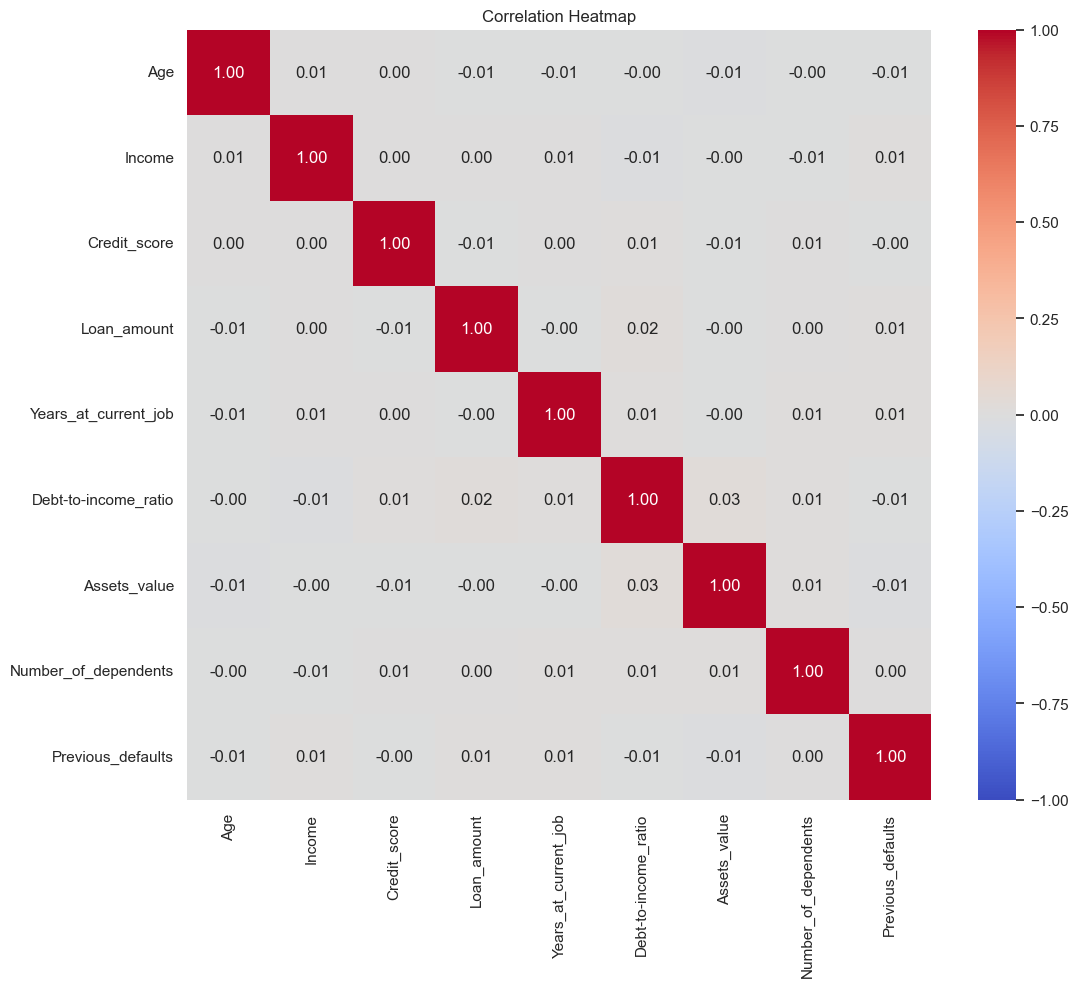

In [13]:
# Correlation heatmap for numerical features
num_features = ['Age', 'Income', 'Credit_score', 'Loan_amount', 'Years_at_current_job', 
                 'Debt-to-income_ratio', 'Assets_value', 'Number_of_dependents', 'Previous_defaults']
plt.figure(figsize=(12,10))
correlation_matrix = f_risk[num_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

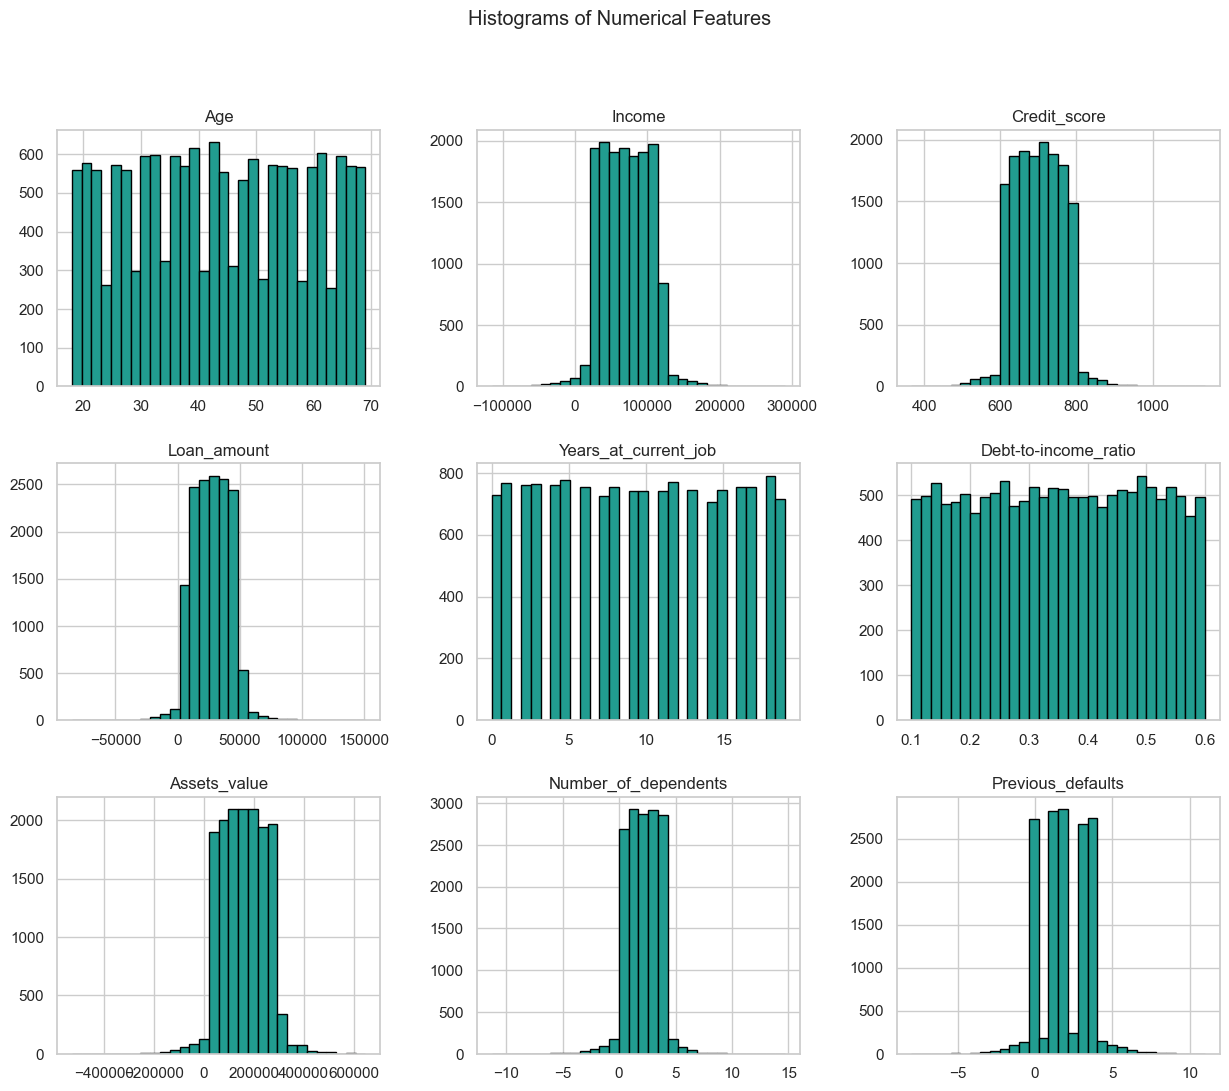

In [14]:
f_risk[num_features].hist(figsize=(15, 12), bins=30, edgecolor='black',color='#219C90',)
plt.suptitle('Histograms of Numerical Features')
plt.show()

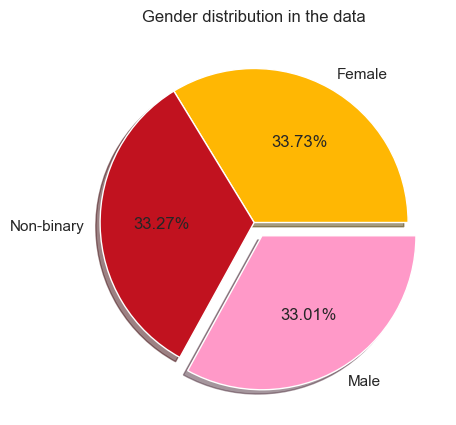

In [15]:
#Gender Percentage
plt.figure(figsize=(10,5))
f_risk['Gender'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',
     explode=[0,0,0.1],
    labels=['Female','Non-binary','Male'],
    colors=['#ffb703','#c1121f','#ff99c8'],
    autopct='%1.2f%%',
    shadow=True,ylabel="")
plt.title('Gender distribution in the data')
plt.show()

<Figure size 1000x500 with 0 Axes>

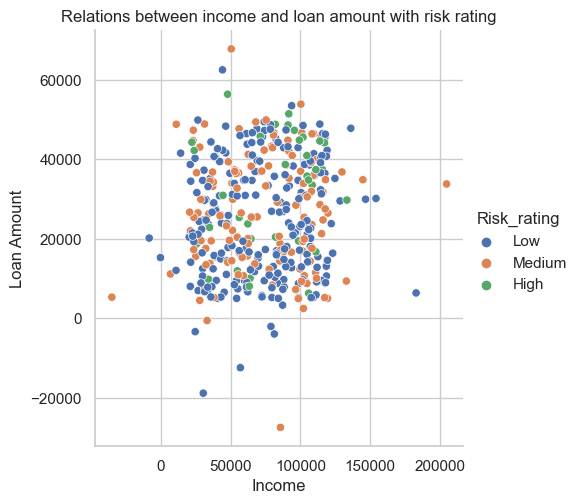

In [16]:
plt.figure(figsize=(10,5))
sns.relplot(data=f_risk[:400],x='Income',y='Loan_amount',hue='Risk_rating')
plt.title('Relations between income and loan amount with risk rating')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

In [18]:
cate=f_risk.select_dtypes(include='object')
cate.head()

,Gender,Education_level,Marital_status,Loan_purpose,Employment_status,Payment_history,City,State,Country,Risk_rating
0,Male,PhD,Divorced,Business,Unemployed,Poor,Port Elizabeth,AS,Cyprus,Low
1,Female,Bachelor's,Widowed,Auto,Employed,Fair,North Catherine,OH,Turkmenistan,Medium
2,Non-binary,Master's,Single,Home,Employed,Fair,South Scott,OK,Luxembourg,Medium
3,Male,Bachelor's,Single,Personal,Unemployed,Excellent,Robinhaven,PR,Uganda,Medium
4,Non-binary,Bachelor's,Widowed,Personal,Unemployed,Fair,New Heather,IL,Namibia,Low


In [19]:
label=LabelEncoder()
f_risk['Gender']=label.fit_transform(f_risk['Gender'])
f_risk['Education_level']=label.fit_transform(f_risk['Education_level'])
f_risk['Marital_status']=label.fit_transform(f_risk['Marital_status'])
f_risk['Loan_purpose']=label.fit_transform(f_risk['Loan_purpose'])
f_risk['Employment_status']=label.fit_transform(f_risk['Employment_status'])
f_risk['Payment_history']=label.fit_transform(f_risk['Payment_history'])
f_risk['City']=label.fit_transform(f_risk['City'])
f_risk['State']=label.fit_transform(f_risk['State'])
f_risk['Country']=label.fit_transform(f_risk['Country'])
f_risk['Risk_rating']=label.fit_transform(f_risk['Risk_rating'])

In [20]:
X=f_risk.drop('Risk_rating',axis=1)
y=f_risk['Risk_rating']

In [21]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [22]:
logist = LogisticRegression()
logist.fit(X_train,y_train)
y_pred = logist.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 1]


c:\Users\SHAMNA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
print(f'Logisticmodel accuracy_score {accuracy_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))

Logisticmodel accuracy_score 0.5965333333333334
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       398
           1       0.60      1.00      0.75      2237
           2       0.00      0.00      0.00      1115

    accuracy                           0.60      3750
   macro avg       0.20      0.33      0.25      3750
weighted avg       0.36      0.60      0.45      3750



c:\Users\SHAMNA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SHAMNA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SHAMNA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
